### 資料匯入

In [1]:
import pandas as pd
df = pd.read_csv("train_ajEneEa.csv",encoding = "big5").dropna(subset=['id','gender','age','hypertension','heart_disease','bmi','smoking_status','avg_glucose_level'])
df

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
11,64908,Male,79.0,0,1,Yes,Private,Urban,57.08,22.0,formerly smoked,0
12,63884,Female,37.0,0,0,Yes,Private,Rural,162.96,39.4,never smoked,0
13,37893,Female,37.0,0,0,Yes,Private,Rural,73.50,26.1,formerly smoked,0
14,67855,Female,40.0,0,0,Yes,Private,Rural,95.04,42.4,never smoked,0


### 預處理

In [2]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
stroke,0,0.0
smoking_status,0,0.0
bmi,0,0.0
avg_glucose_level,0,0.0
Residence_type,0,0.0
work_type,0,0.0
ever_married,0,0.0
heart_disease,0,0.0
hypertension,0,0.0
age,0,0.0


### Gini

In [3]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',max_depth=4)   # 決策深度設為 4
tree.fit(df[['bmi','avg_glucose_level']], df[['hypertension']])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", feature_names=['bmi','avg_glucose_level'],
                class_names=['0', '1'],)

In [5]:
!dot -Tpng tree.dot -o tree.png   # need to use a package, conda install graphviz

Error: dot: can't open #
Error: dot: can't open need
Error: dot: can't open to
Error: dot: can't open use
Error: dot: can't open a
Error: dot: can't open package,
Error: dot: can't open conda
Error: dot: can't open install
Error: dot: can't open graphviz


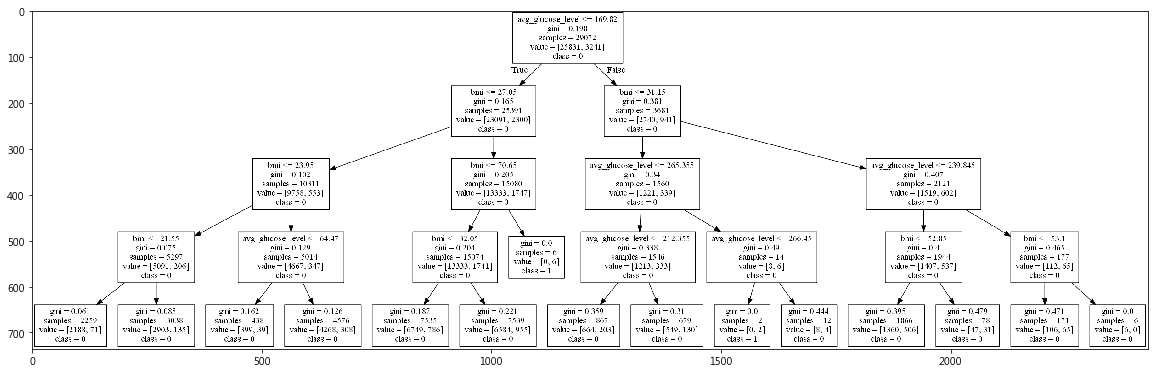

In [6]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
img = mpimg.imread('tree.png')
fig = plt.figure(figsize=(20,18))
plt.imshow(img)

In [7]:
tree.feature_importances_.tolist()
df = pd.DataFrame({'feature':['bmi','avg_glucose_level'],'feature_importance':tree.feature_importances_.tolist()})
df = df.sort_values(by=['feature_importance'],ascending=False).reset_index(drop=True)
df

,feature,feature_importance
0,avg_glucose_level,0.701128
1,bmi,0.298872


In [8]:
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.02*height, '%f'%float(height),
                ha='center', va='bottom')

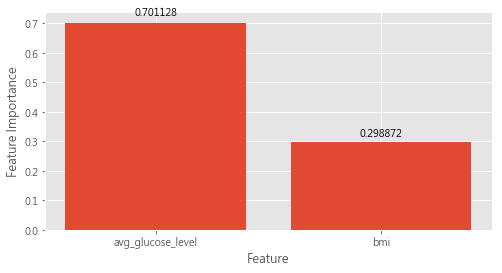

In [9]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(8,4))


gini = plt.bar(df.index,df['feature_importance'],align='center')
plt.xlabel('Feature') #X軸名稱
plt.ylabel('Feature Importance') #Y軸名稱
plt.xticks(df.index, df['feature']) #X軸項目名稱

autolabel(gini)
#for i in range(len(df.index)):
#    plt.annotate(round(df['gini_importance'][i],3),xy=(df.index[i],df['gini_importance'][i]),
#             xytext=(df.index[i],df['gini_importance'][i]))

plt.show()

### Entrpoy

In [10]:
import pandas as pd
df = pd.read_csv("train_ajEneEa.csv",encoding = "big5").dropna(subset=['id','gender','age','hypertension','heart_disease','bmi','smoking_status','avg_glucose_level'])
df.head()

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)
tree.fit(df[['bmi','avg_glucose_level']], df[['smoking_status']])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
from sklearn.model_selection import train_test_split

X = df[['bmi','avg_glucose_level']]
y = df['smoking_status']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [13]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree_en.dot", feature_names=['bmi','avg_glucose_level'],
                class_names=['formerly smoked','never smoked' ,'smokes'])

In [14]:
!dot -Tpng tree_en.dot -o tree_en.png

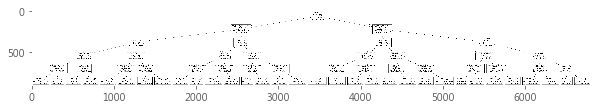

In [15]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
img = mpimg.imread('tree_en.png')
fig = plt.figure(figsize=(10,8))
plt.imshow(img)

In [16]:
from sklearn import metrics
print(metrics.classification_report(y_test, tree.predict(X_test)))
print(metrics.confusion_matrix(y_test, tree.predict(X_test),labels=['formerly smoked','never smoked', 'smokes']))

                 precision    recall  f1-score   support

formerly smoked       0.44      0.01      0.02      2111
   never smoked       0.54      1.00      0.70      4730
         smokes       0.67      0.01      0.02      1881

    avg / total       0.55      0.54      0.39      8722

[[  23 2086    2]
 [  14 4709    7]
 [  15 1848   18]]


In [17]:
tree.feature_importances_.tolist()
df = pd.DataFrame({'feature':['bmi','avg_glucose_level'],'feature_importance':tree.feature_importances_.tolist()})
df = df.sort_values(by=['feature_importance'],ascending=False).reset_index(drop=True)
df

,feature,feature_importance
0,avg_glucose_level,0.575658
1,bmi,0.424342


C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


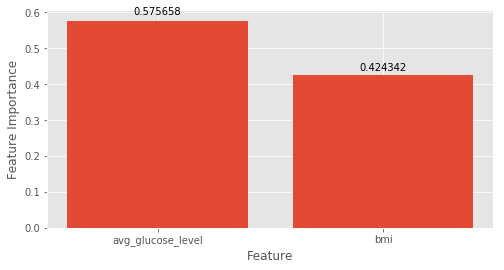

In [18]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(8,4))


#中文字體 font = matplotlib.font_manager.FontProperties(fname='wt011.ttf')
plt.rcParams['font.family']='SimHei'

gini = plt.bar(df.index,df['feature_importance'],align='center')
plt.xlabel('Feature') #X軸名稱
plt.ylabel('Feature Importance') #Y軸名稱
plt.xticks(df.index, df['feature']) #X軸項目名稱

autolabel(gini)
#for i in range(len(df.index)):
#    plt.annotate(round(df['gini_importance'][i],3),xy=(df.index[i],df['gini_importance'][i]),
#             xytext=(df.index[i],df['gini_importance'][i]))

plt.show()